# Dogs vs Cats

In [93]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [95]:
path = 'dogs-vs-cats/train/'

In [96]:
# 사이즈 재설정 (모두 사이즈가 다르니까 한 사이즈로 통일시키기 위해서)
ROW, COL = 96, 96

dogs, cats = [],[]
y_dots, y_cats = [], []

In [97]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [100]:
# 1111개 강아지 이미지 로드

dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    #dog = image.img_to_array(dog)
    dogs.append(dog)

In [101]:
dog.shape

(96, 96)

In [102]:
# 1111개 고양이 이미지 로드

cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    #cat = image.img_to_array(cat)
    cats.append(cat)

In [103]:
classes = ['dog','cat']

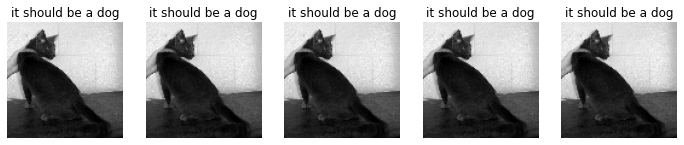

In [105]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    #img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    
    plt.axis('off')
    plt.title('it should be a {}'.format(classes[0]))
plt.show()

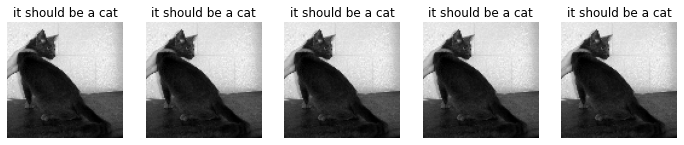

In [106]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1,5, i+1)
    #img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    
    plt.axis('off')
    plt.title('it should be a {}'.format(classes[1]))
plt.show()

In [107]:
dog.shape

(96, 96)

In [108]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [118]:
# 모델에 맞게 넘파이 배열로 변환
# X와 target 파일을 만든다
#0~1까지의 값으로 바꾸기 위해서
dogs = dogs.reshape(X_train.shape[0], 784)
#reshape하는 과정과 같음
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

AttributeError: 'list' object has no attribute 'reshape'

In [115]:
dogs.shape

AttributeError: 'list' object has no attribute 'shape'

In [51]:
X_train = dogs/255
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [47]:
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [48]:
len(X_train)

2222

In [53]:
X_train.shape

(1111, 96, 96, 1)

## 모델 생성

In [37]:
model = Sequential([
    Dense(512, input_shape = (ROW, COL), activation='relu'),
    Dense(250, activation='relu'),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 96, 512)           49664     
_________________________________________________________________
dense_5 (Dense)              (None, 96, 250)           128250    
_________________________________________________________________
dense_6 (Dense)              (None, 96, 2)             502       
Total params: 178,416
Trainable params: 178,416
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

## 모델 학습

In [23]:
X_train.shape

(2222, 96, 96, 1)

In [24]:
y_train.shape

(2222, 2)

In [25]:
X_test.shape

(2222, 96, 96, 1)

In [27]:
y_test.shape

(2222, 2)

In [41]:
model.fit(X_train, y_train, batch_size=32, epochs =40)

ValueError: Error when checking input: expected dense_4_input to have 3 dimensions, but got array with shape (2222, 96, 96, 1)

In [88]:
from tensorflow.keras.models import load_model
del model

In [89]:
model = load_model('model/dogs_vs_cats-cnn-06-0.7527.hdf5')

In [90]:
scores = model.evaluate(X_test, y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

ValueError: Can not squeeze dim[1], expected a dimension of 1, got 2 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,2].

In [ ]:
scores = model.evaluate(X_)